In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [ ]:
import pandas as pd
from textblob import TextBlob

In [ ]:

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

import warnings

warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/sentiment.csv")
print(df)

                                             product_name product_price Rate  \
0       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
1       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
2       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
3       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
4       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
...                                                   ...           ...  ...   
205047  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299    5   
205048  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299    5   
205049  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299    3   
205050  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299    5   
205051  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299    4   

                 Review                

In [ ]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [ ]:
df.tail()

,product_name,product_price,Rate,Review,Summary,Sentiment
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive
205051,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,4,value-for-money,very good but mixing bowl not included is one ...,neutral


In [ ]:
df.describe()

,product_name,product_price,Rate,Review,Summary,Sentiment
count,205052,205052,205052,180388,205041,205052
unique,958,525,8,1324,92923,3
top,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,good,positive
freq,6005,9150,118765,9016,17430,166581


In [ ]:
df.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [ ]:
df.shape

(205052, 6)

In [ ]:
df.dropna(inplace=True)

In [ ]:

df

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive


In [ ]:
df.shape

(180379, 6)

In [ ]:
df.describe()

,product_name,product_price,Rate,Review,Summary,Sentiment
count,180379,180379,180379,180379,180379,180379
unique,841,479,8,1324,85306,3
top,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,good,positive
freq,6005,9150,105641,9014,15146,147171


In [ ]:
df.describe().T

,count,unique,top,freq
product_name,180379,841,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,6005
product_price,180379,479,1299,9150
Rate,180379,8,5,105641
Review,180379,1324,wonderful,9014
Summary,180379,85306,good,15146
Sentiment,180379,3,positive,147171


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180379 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   180379 non-null  object
 1   product_price  180379 non-null  object
 2   Rate           180379 non-null  object
 3   Review         180379 non-null  object
 4   Summary        180379 non-null  object
 5   Sentiment      180379 non-null  object
dtypes: object(6)
memory usage: 9.6+ MB


In [ ]:
df[['product_name','product_price','Review','Sentiment']].describe()

,product_name,product_price,Review,Sentiment
count,180379,180379,180379,180379
unique,841,479,1324,3
top,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,wonderful,positive
freq,6005,9150,9014,147171


In [ ]:
x=df["product_name"].nunique()
print("No.of products:",x)

No.of products: 841


In [ ]:
print("Product names:")
for product in df["product_name"].unique():
    print(product)

Product names:
Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)
Candes 60 L Room/Personal Air Cooler??????(White, Black, CRETA)
MAHARAJA WHITELINE 65 L Desert Air Cooler??????(White, Grey, Rambo Grey / AC-303)
Crompton 75 L Desert Air Cooler??????(White, Teal, ACGC-DAC751)
boAt Rockerz 510 Super Extra Bass Bluetooth Headset??????(Molten Orange, On the Ear)
Aroma NB119 Titanium - 48 Hours Playtime Bluetooth Neckband Bluetooth Headset??????(Green, In the Ear)
OnePlus Bullets Wireless Z2 with Fast Charge, 30 Hrs Battery Life, Earphones with mic Bluetooth Headset??????(Magico Black, In the Ear)
OnePlus Bullets Wireless Z2 Bluetooth Headset??????(Acoustic Red, In the Ear)
Mivi Roam2 5 W Bluetooth Speaker??????(Black, Mono Channel)
etmax NANO BLACK 30 W Bluetooth Home Theatre??????(Black, Stereo Channel)
Mivi Fort S16 Soundbar with 2 full range drivers, Made in India 16 W Bluetooth Soundbar??????(Black, 2.0 Channel)
I K

In [ ]:
df.corr()

""


In [ ]:
x=df.loc[df["product_name"]=="PRO365 Uplight Wall Lamp With Bulb"]
print(x.to_string())

                              product_name product_price Rate                     Review                                                                                                                                                                                                        Summary Sentiment
169273  PRO365 Uplight Wall Lamp With Bulb           199    5                  wonderful                                                                                                                                                                   multi color changing lamp which is very nice  positive
169274  PRO365 Uplight Wall Lamp With Bulb           199    5                  wonderful                                                                                                                                                                                                  its very nice  positive
169275  PRO365 Uplight Wall Lamp With Bulb           199    4       good quality p

In [ ]:
x=df.loc[df["product_name"]=="BAJAJ 17 L Solo Microwave Oven1701MT White"]
print(x.to_string())

                                      product_name product_price Rate                                                          Review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Summary Sentiment
193367  BAJAJ 17 L Solo Microwave Oven1701MT White          4498    4                                                    nice product                  awesome microwave within a perfect pricei am using it for last 13 days and i must say thatthis is working perfectly goodmy only advice to all of you specially who were going to use the microwave for the 1 st timethat st

In [ ]:
x=df.loc[df["product_name"]=="SAMSUNG 28 L Convection Microwave OvenMC28A5025VP Black with Pattern"]
print(x.to_string())

                                                                product_name product_price Rate                 Review                                                                                                                                                                                               Summary Sentiment
192673  SAMSUNG 28 L Convection Microwave OvenMC28A5025VP Black with Pattern         14190    5              excellent                                                                                  its a very good product with almost all useful features its safe to use also even my 15 years daughter can handle it  positive
192674  SAMSUNG 28 L Convection Microwave OvenMC28A5025VP Black with Pattern         14190    4              very good                                                                                                                                                       good oven nice auto cook menu fast and reliable  positive
192675  SAMSUNG 28 

In [ ]:
df=df.rename(columns={"Rate":"rating"})
print(df)

                                             product_name product_price  \
0       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999   
1       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999   
2       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999   
3       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999   
4       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999   
...                                                   ...           ...   
205047  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299   
205048  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299   
205049  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299   
205050  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299   
205051  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299   

       rating           Review  \
0           5           super!   
1           5          awesome 

In [ ]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
205047     True
205048     True
205049    False
205050    False
205051    False
Length: 180379, dtype: bool

In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
df

,product_name,product_price,rating,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205045,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,terrific,good quality products,positive
205046,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,classy product,beautiful set very nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive


In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


In [ ]:
df

,product_name,product_price,rating,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5.0,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5.0,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3.0,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1.0,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3.0,fair,ok ok product,neutral
...,...,...,...,...,...,...
205045,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5.0,terrific,good quality products,positive
205046,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5.0,classy product,beautiful set very nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3.0,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5.0,just wow!,awesome product,positive


In [ ]:

pd.unique(df['rating'])

array([ 5.,  3.,  1.,  4.,  2., nan])

In [ ]:
print("rate:")
for product in df["rating"].unique():
    print(product)


rate:
5.0
3.0
1.0
4.0
2.0
nan


In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,product_name,product_price,rating,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5.0,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5.0,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3.0,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1.0,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3.0,fair,ok ok product,neutral
...,...,...,...,...,...,...
205045,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5.0,terrific,good quality products,positive
205046,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5.0,classy product,beautiful set very nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3.0,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5.0,just wow!,awesome product,positive


In [ ]:
print("Rating:")
for product in df["rating"].unique():
    print(product)

Rating:
5.0
3.0
1.0
4.0
2.0


In [ ]:
df.shape

(154464, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154464 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   product_name   154464 non-null  object 
 1   product_price  154464 non-null  object 
 2   rating         154464 non-null  float64
 3   Review         154464 non-null  object 
 4   Summary        154464 non-null  object 
 5   Sentiment      154464 non-null  object 
dtypes: float64(1), object(5)
memory usage: 8.2+ MB


In [ ]:
# Convert 'product_price' and 'rating' columns to integer data types
df['product_price'] = df['product_price'].astype(int)
df['rating'] = df['rating'].astype(int)

# Check the data types after conversion
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 154464 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   154464 non-null  object
 1   product_price  154464 non-null  int64 
 2   rating         154464 non-null  int64 
 3   Review         154464 non-null  object
 4   Summary        154464 non-null  object
 5   Sentiment      154464 non-null  object
dtypes: int64(2), object(4)
memory usage: 8.2+ MB
None


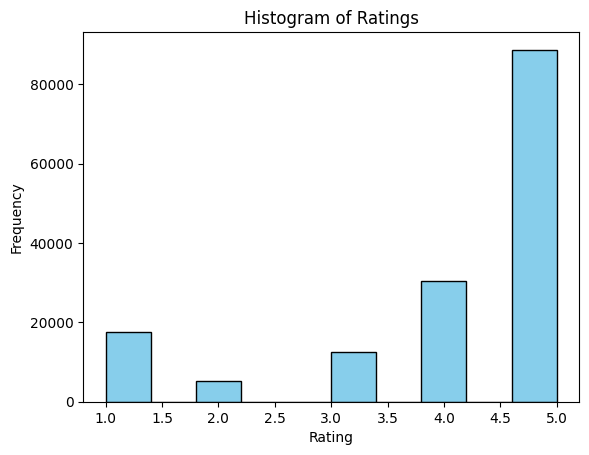

In [ ]:
plt.hist(df['rating'],  color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.show()

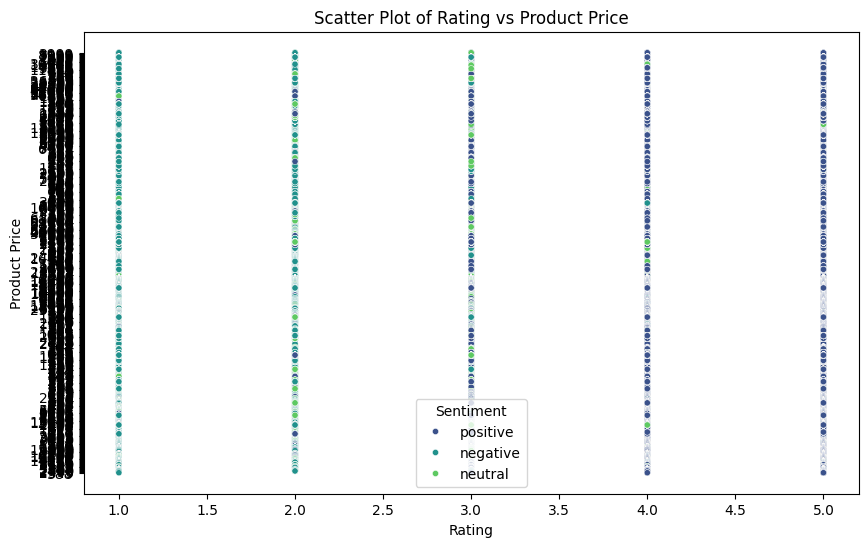

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='product_price', data=df, hue='Sentiment', palette='viridis',s=20)
plt.title('Scatter Plot of Rating vs Product Price')
plt.xlabel('Rating')
plt.ylabel('Product Price')
plt.show()

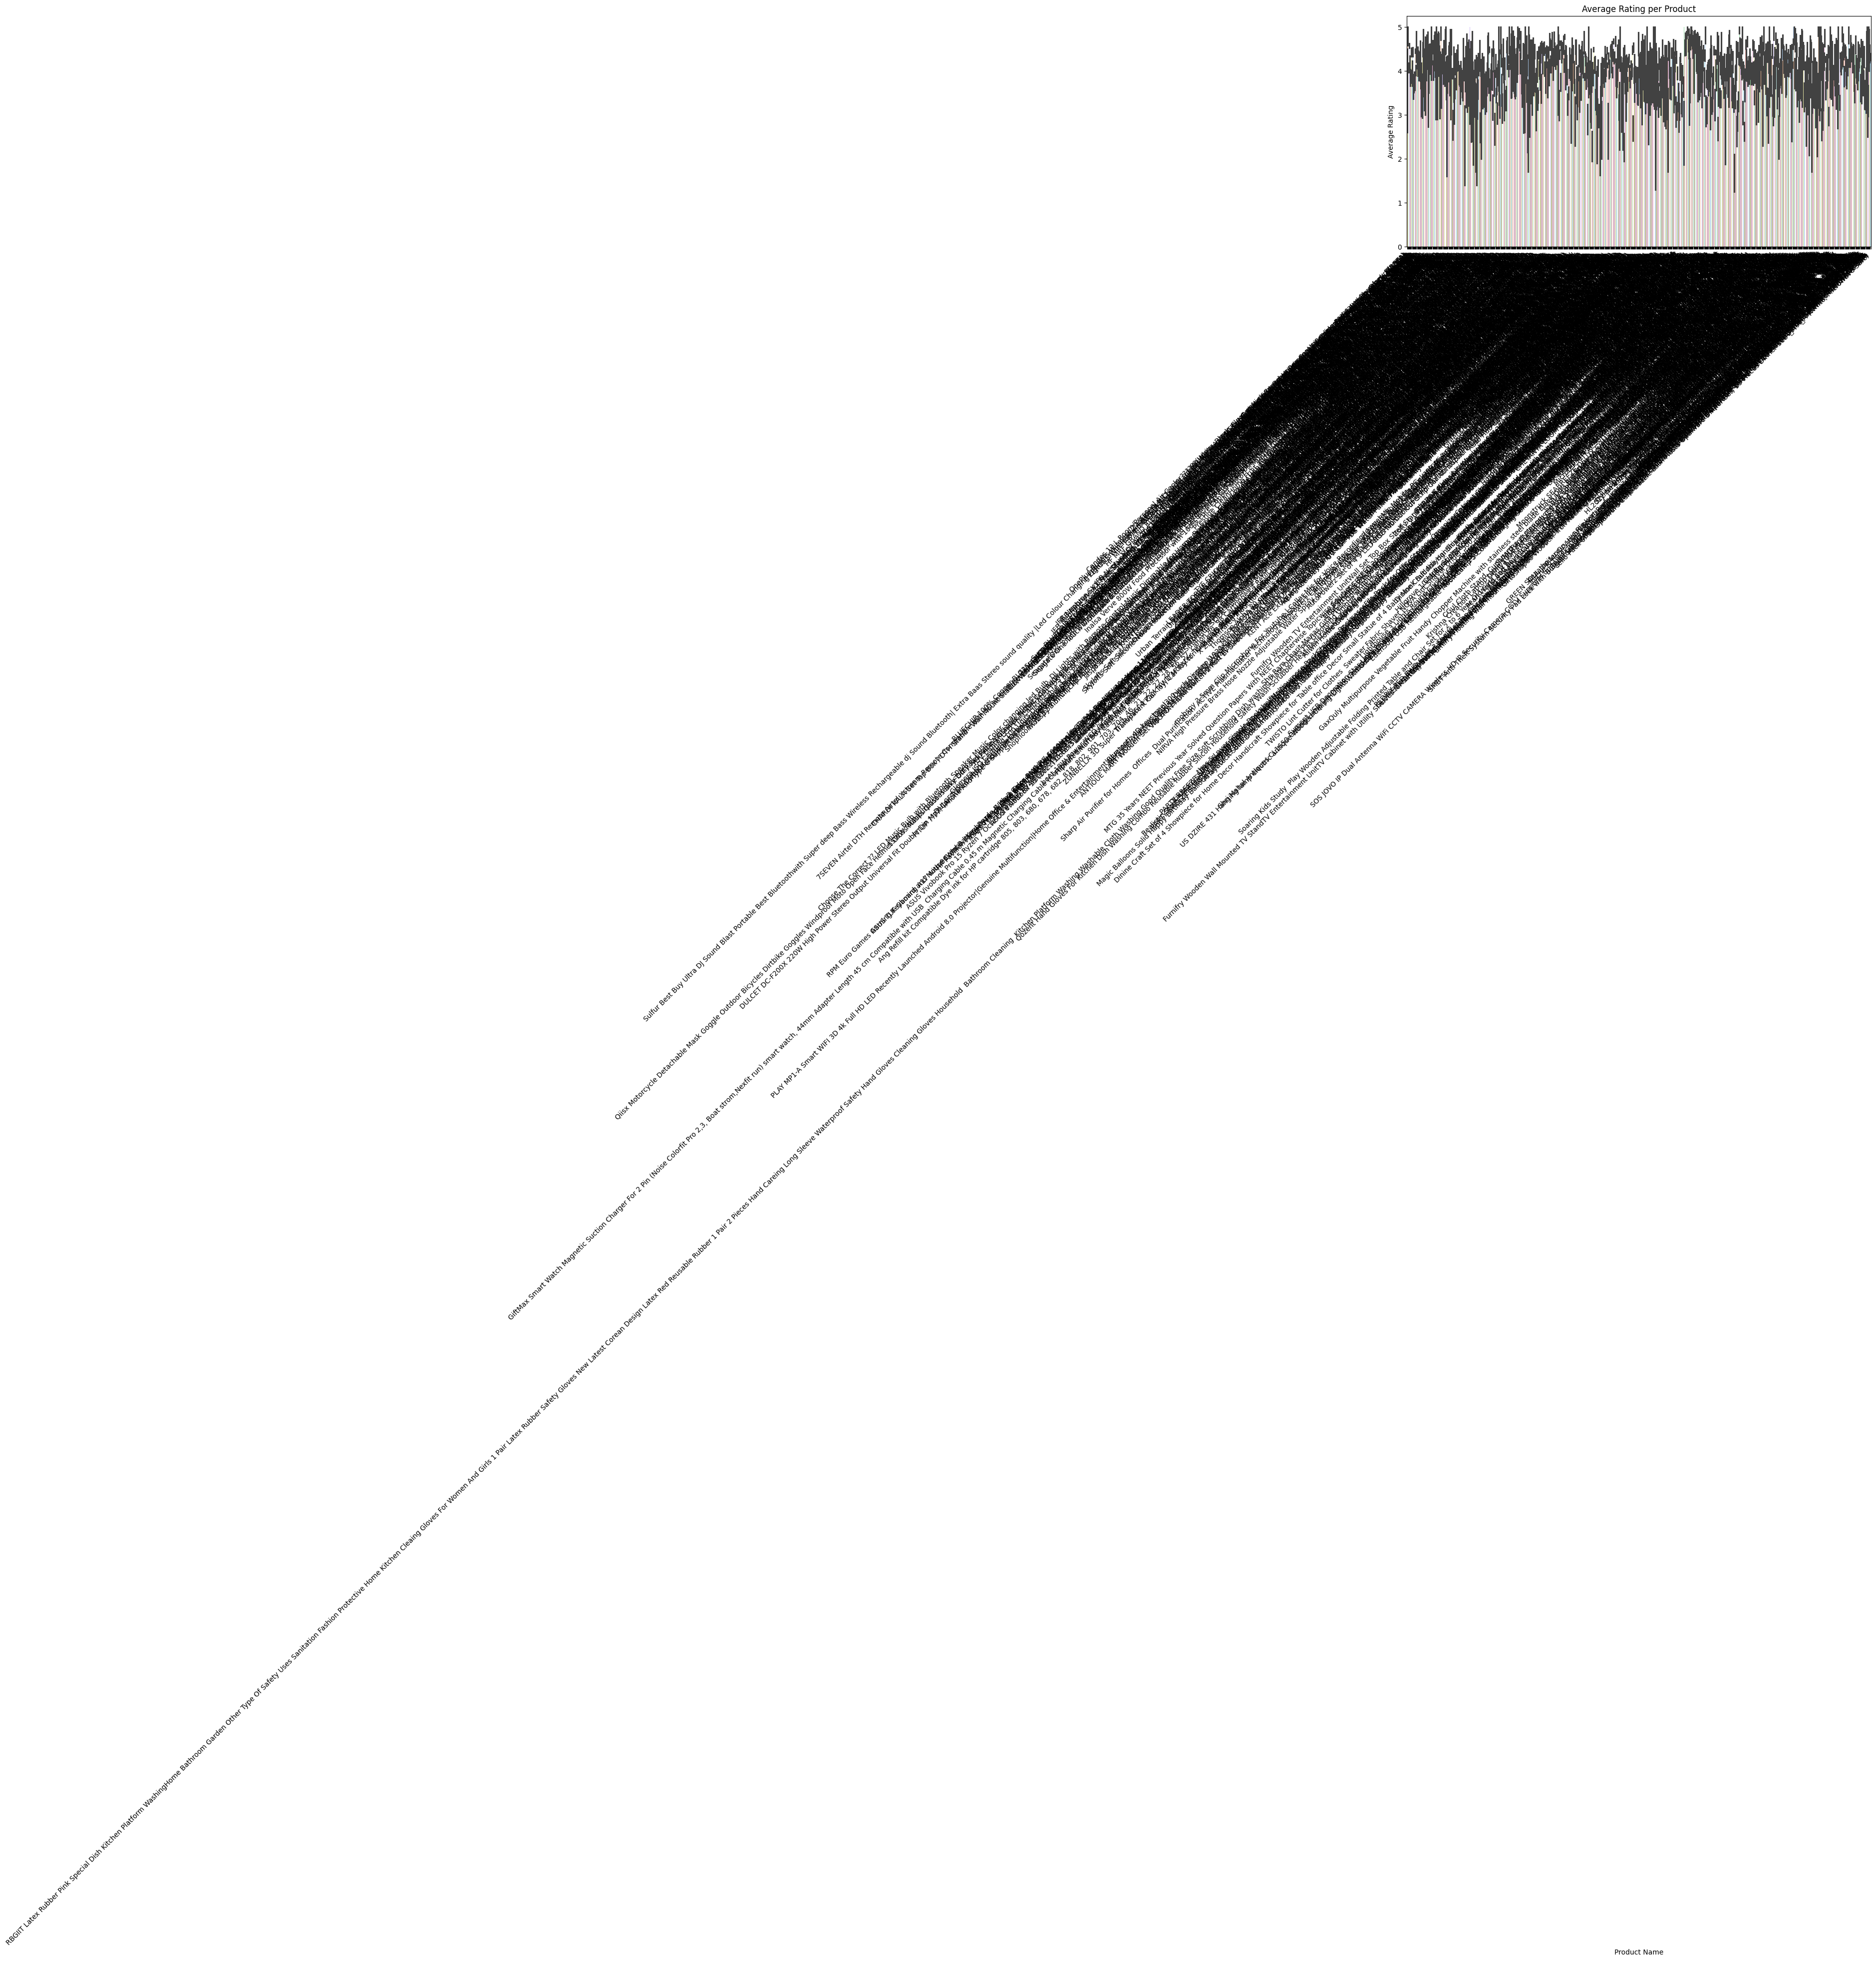

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='product_name', y='rating', data=df, palette='pastel')
plt.title('Average Rating per Product')
plt.xlabel('Product Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

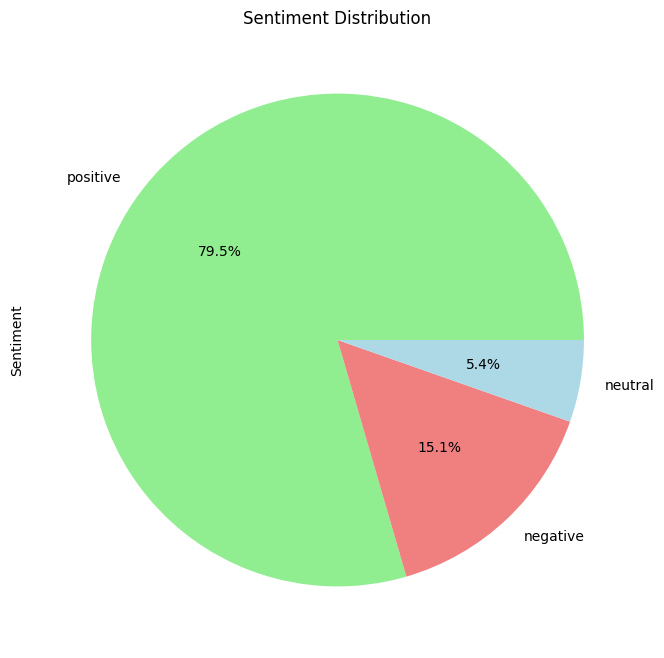

In [ ]:
plt.figure(figsize=(8, 8))
df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue'])
plt.title('Sentiment Distribution')
plt.show()

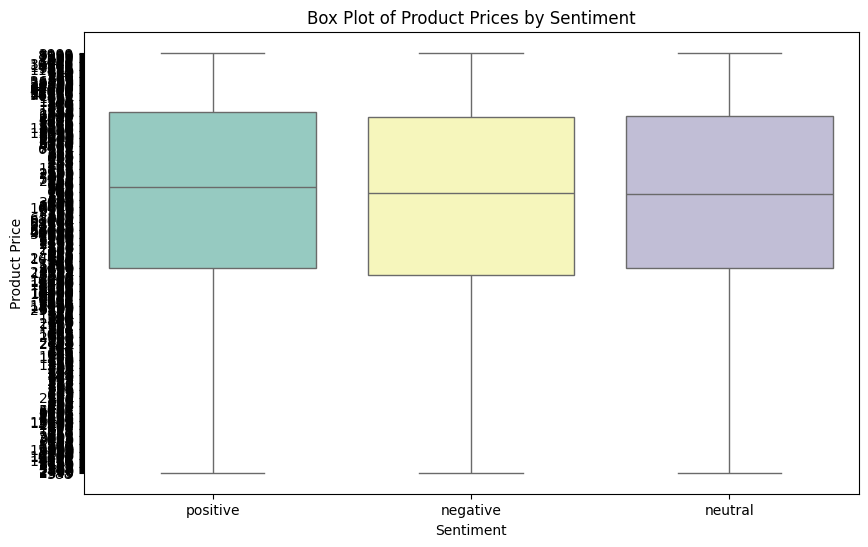

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='product_price', data=df, palette='Set3')
plt.title('Box Plot of Product Prices by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Product Price')
plt.show()

<Axes: xlabel='rating', ylabel='Density'>

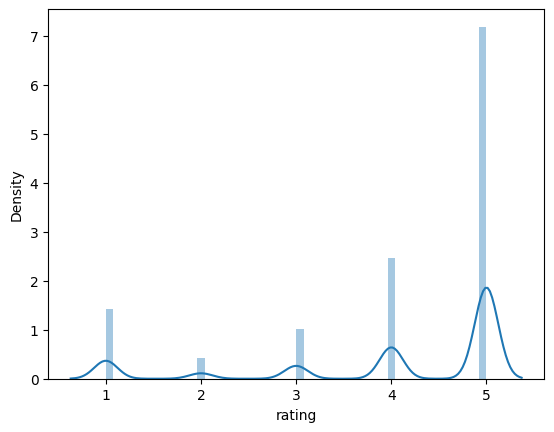

In [ ]:
sns.distplot(df["rating"])

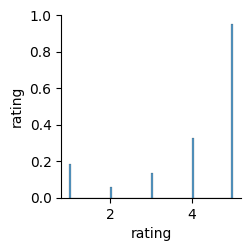

In [ ]:
sns.pairplot(df)

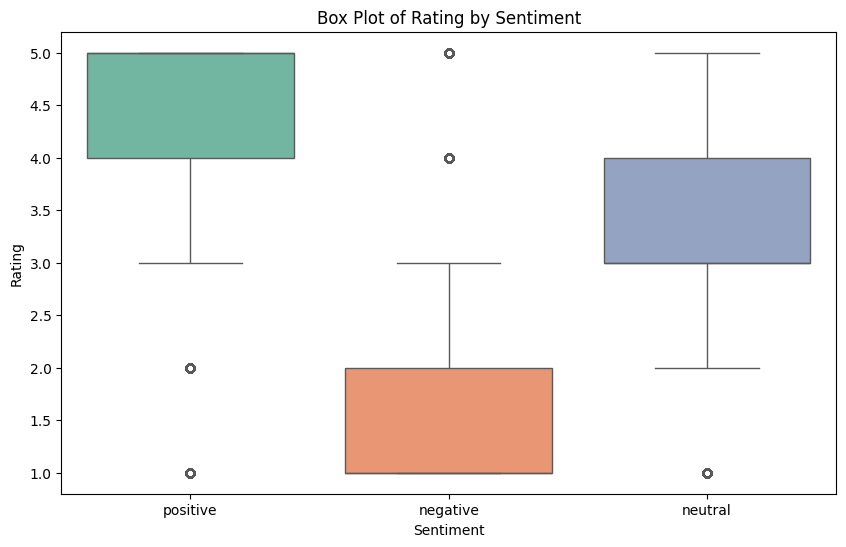

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='rating', data=df, palette='Set2')
plt.title('Box Plot of Rating by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.show()

Text(0.5, 1.0, 'graph showing the average rating for each Sentiment')

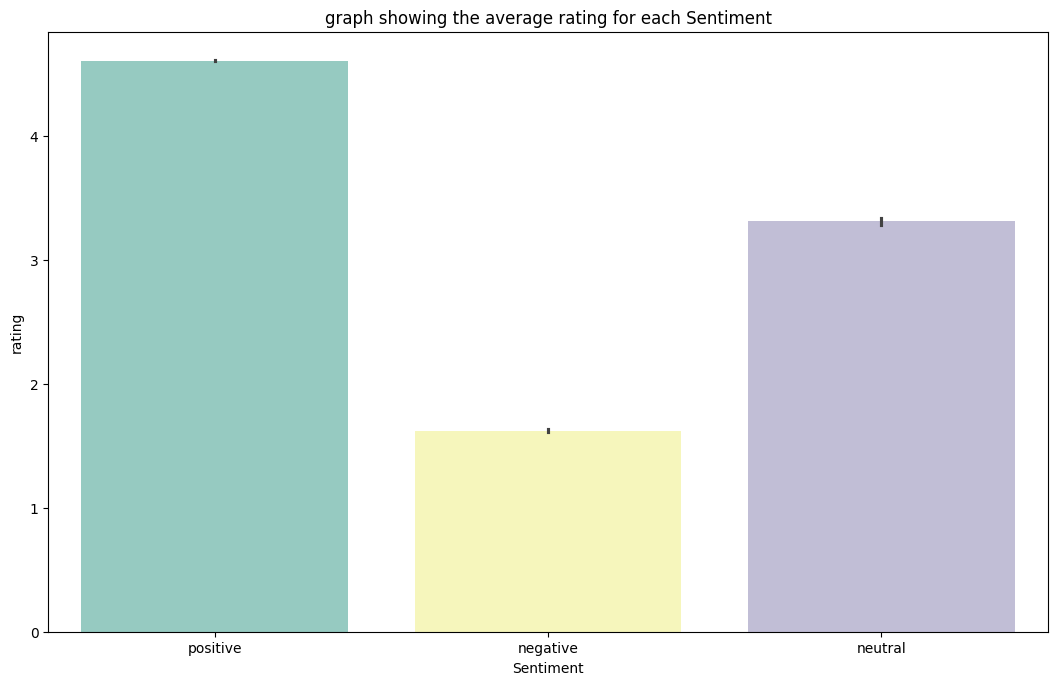

In [ ]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_axes([0,0,1,1])
sns.barplot(x="Sentiment",y="rating",data=df, palette='Set3')
plt.title("graph showing the average rating for each Sentiment")

In [ ]:

cv = TfidfVectorizer(max_features=2500)

X = cv.fit_transform(df['Review'] ).toarray()

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df['Sentiment'],

                                                    test_size=0.33,

                                                    stratify=df['Sentiment'],

                                                    random_state = 42)

In [ ]:

from sklearn.tree import DecisionTreeClassifier



model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)


#testing the model

pred = model.predict(X_train)

print(accuracy_score(y_train,pred))

0.9042129674364673


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X and df['Sentiment'] are defined earlier

X_train, X_test, y_train, y_test = train_test_split(
    X, df['Sentiment'],
    test_size=0.33,
    stratify=df['Sentiment'],
    random_state=42
)

# Use RandomForestClassifier instead of DecisionTreeClassifier
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

# Testing the model
pred = model.predict(X_train)

print("Training Accuracy:", accuracy_score(y_train, pred))


Training Accuracy: 0.9042129674364673


In [ ]:

cv = TfidfVectorizer(max_features=2500)

X = cv.fit_transform(df['Review'] ).toarray()

In [ ]:
cv = TfidfVectorizer(max_features=2500)

X = cv.fit_transform(df['Review'] ).toarray()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df['Sentiment'],

                                                    test_size=0.33,

                                                    stratify=df['Sentiment'],

                                                    random_state = 42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming X and df['Sentiment'] are defined earlier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, df['Sentiment'],
    test_size=0.33,
    stratify=df['Sentiment'],
    random_state=42
)

# Use KNeighborsClassifier instead of RandomForestClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Testing the model
pred = model.predict(X_train)

print("Training Accuracy:", accuracy_score(y_train, pred))


Training Accuracy: 0.8905981254227462


An error occurred while plotting the confusion matrix: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).


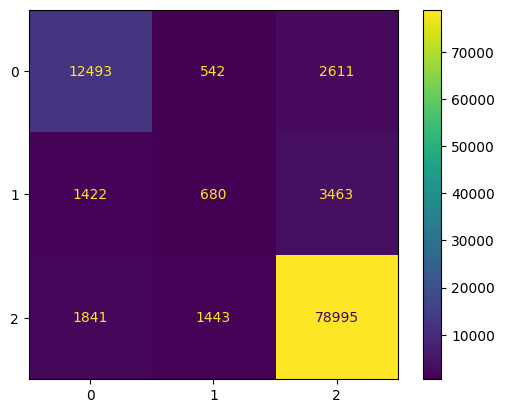

In [ ]:
from sklearn import metrics

try:
    cm = confusion_matrix(y_train, pred)

    # Assuming y_train contains binary labels (True/False), you can specify the labels accordingly
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['False', 'True'])

    cm_display.plot()
    plt.show()
except ValueError as e:
    print("An error occurred while plotting the confusion matrix:", e)


In [ ]:
print("y_test shape:", y_test.shape)
print("pred shape:", pred.shape)


y_test shape: (50974,)
pred shape: (103490,)


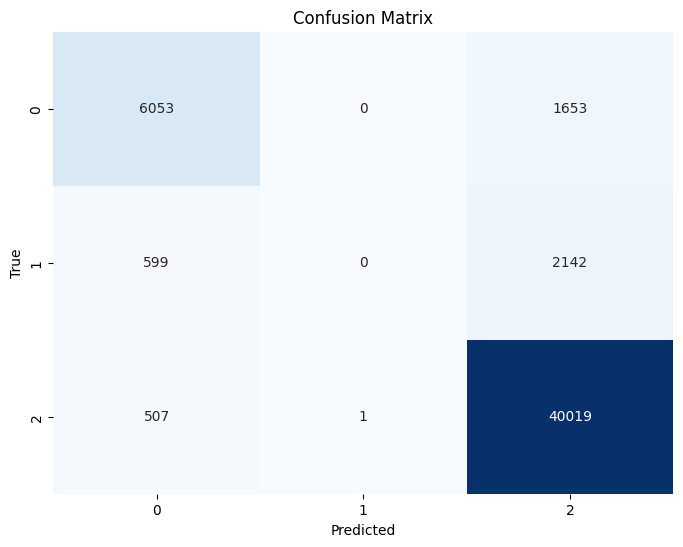

Sentiment Percentage: {'positive': 85.95077170084939, 'negative': 14.032395898073338, 'neutral': 0.01683240107727367}
Count of Reviews by Sentiment: Counter({'positive': 122806, 'negative': 23352, 'neutral': 8306})


In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class RandomForestClassifierWithSentimentAnalysis:
    def __init__(self, X, y, test_size=0.33, random_state=42):
        self.X = X
        self.y = y
        self.test_size = test_size
        self.random_state = random_state

    def train_and_evaluate(self):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(
            self.X, self.y,
            test_size=self.test_size,
            stratify=self.y,
            random_state=self.random_state
        )

        # Train a Random Forest classifier
        self.model = RandomForestClassifier(random_state=self.random_state)
        self.model.fit(X_train, y_train)

        # Make predictions on the test set
        pred = self.model.predict(X_test)

        # Generate confusion matrix
        cm = confusion_matrix(y_test, pred)

        # Display confusion matrix as a heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

    def predict_sentiment_percentage(self):
        # Predict sentiment for the entire dataset
        pred_all = self.model.predict(self.X)

        # Calculate percentage of each sentiment category
        sentiment_counts = Counter(pred_all)
        total_reviews = len(pred_all)
        sentiment_percentage = {sentiment: count / total_reviews * 100 for sentiment, count in sentiment_counts.items()}
        return sentiment_percentage

    def count_reviews_by_sentiment(self):
        # Count reviews by sentiment
        sentiment_counts = Counter(self.y)
        return sentiment_counts

# Usage example:
# Assuming X and df['Sentiment'] are defined earlier
rf_classifier = RandomForestClassifierWithSentimentAnalysis(X, df['Sentiment'])
rf_classifier.train_and_evaluate()

# Get sentiment percentage
sentiment_percentage = rf_classifier.predict_sentiment_percentage()
print("Sentiment Percentage:", sentiment_percentage)

# Get count of reviews by sentiment
sentiment_counts = rf_classifier.count_reviews_by_sentiment()
print("Count of Reviews by Sentiment:", sentiment_counts)


In [ ]:
sentiment_percentage = rf_classifier.predict_sentiment_percentage()
print("Sentiment Percentage:\n", sentiment_percentage)

# Get count of reviews by sentiment
sentiment_counts = rf_classifier.count_reviews_by_sentiment()
print("Count of Reviews by Sentiment:\n", sentiment_counts)

Sentiment Percentage:
 {'positive': 85.95077170084939, 'negative': 14.032395898073338, 'neutral': 0.01683240107727367}
Count of Reviews by Sentiment:
 Counter({'positive': 122806, 'negative': 23352, 'neutral': 8306})


In [ ]:
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

class RandomForestClassifierWithSentimentAnalysis:
    def __init__(self, df, test_size=0.33, random_state=42):
        self.df = df
        self.test_size = test_size
        self.random_state = random_state
        self.model = None
        self.cv = TfidfVectorizer(max_features=2500)  # Initialize TfidfVectorizer

    def train_and_evaluate(self):
        # Convert text data to TF-IDF features
        X_text = self.cv.fit_transform(self.df['Review']).toarray()

        # Combine text features with other features
        X_other = self.df[['product_price', 'rating']].values
        X = np.concatenate((X_text, X_other), axis=1)
        y = self.df['Sentiment']

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size=self.test_size,
            stratify=y,
            random_state=self.random_state
        )

        # Train a Random Forest classifier
        self.model = RandomForestClassifier(random_state=self.random_state)
        self.model.fit(X_train, y_train)

    def predict_sentiment_for_product(self, product_name):
        # Filter data for the specified product
        product_data = self.df[self.df['product_name'] == product_name]
        if product_data.empty:
            print(f"No data found for product '{product_name}'.")
            return

        # Check if 'rating' column is present in product_data
        if 'rating' not in product_data.columns:
            print("Error: 'rating' column not found in product data.")
            return

        # Extract features for the specified product
        X_text_product = self.cv.transform(product_data['Review']).toarray()
        X_other_product = product_data[['product_price', 'rating']].values
        X_product = np.concatenate((X_text_product, X_other_product), axis=1)

        # Predict sentiment for the specified product
        pred_product = self.model.predict(X_product)

        # Calculate sentiment percentage and count of reviews by sentiment
        sentiment_counts = Counter(pred_product)
        total_reviews = len(pred_product)
        sentiment_percentage = {sentiment: count / total_reviews * 100 for sentiment, count in sentiment_counts.items()}

        return sentiment_percentage, sentiment_counts

# Load your DataFrame 'df' here

# Usage example:
rf_classifier = RandomForestClassifierWithSentimentAnalysis(df)
rf_classifier.train_and_evaluate()

# Get sentiment percentage and count of reviews by sentiment for a specific product
product_name = input("Enter the name of the product: ")
sentiment_percentage_product, sentiment_counts_product = rf_classifier.predict_sentiment_for_product(product_name)
print(f"Sentiment Percentage for '{product_name}':", sentiment_percentage_product)
print(f"Count of Reviews by Sentiment for '{product_name}':", sentiment_counts_product)


Enter the name of the product: Bajaj GX1 500 W Mixer Grinder
Sentiment Percentage for 'Bajaj GX1 500 W Mixer Grinder': {'positive': 79.34131736526946, 'negative': 19.46107784431138, 'neutral': 1.1976047904191618}
Count of Reviews by Sentiment for 'Bajaj GX1 500 W Mixer Grinder': Counter({'positive': 530, 'negative': 130, 'neutral': 8})


In [ ]:
product_name = input("Enter the name of the product: ")
sentiment_percentage_product, sentiment_counts_product = rf_classifier.predict_sentiment_for_product(product_name)
print(f"Sentiment Percentage for '{product_name}':", sentiment_percentage_product)
print(f"Count of Reviews by Sentiment for '{product_name}':", sentiment_counts_product)

Enter the name of the product: Prestige Plus Atlas 750 W Juicer Mixer Grinder (4 Jars, Blue, White)
Sentiment Percentage for 'Prestige Plus Atlas 750 W Juicer Mixer Grinder (4 Jars, Blue, White)': {'positive': 76.25806451612902, 'negative': 22.064516129032256, 'neutral': 1.6774193548387095}
Count of Reviews by Sentiment for 'Prestige Plus Atlas 750 W Juicer Mixer Grinder (4 Jars, Blue, White)': Counter({'positive': 591, 'negative': 171, 'neutral': 13})


In [ ]:
import pickle


In [ ]:


# Train and evaluate the model
rf_classifier = RandomForestClassifierWithSentimentAnalysis(df)
rf_classifier.train_and_evaluate()

# Save the trained model using pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)


In [ ]:
def predict_sentiment_for_product(self, product_name):
    # Filter data for the specified product
    product_data = self.df[self.df['product_name'] == product_name]
    if product_data.empty:
        print(f"No data found for product '{product_name}'.")
        return None, None

    # Predict sentiment for the specified product
    X_product = product_data.drop(columns=['Sentiment'])
    pred_product = self.model.predict(X_product)

    # Calculate percentage of each sentiment category for the product
    sentiment_counts = Counter(pred_product)
    total_reviews = len(pred_product)
    sentiment_percentage = {sentiment: count / total_reviews * 100 for sentiment, count in sentiment_counts.items()}
    return sentiment_percentage, sentiment_counts


In [ ]:
# Load the trained model from file
with open('random_forest_model.pkl', 'rb') as file:
    rf_classifier = pickle.load(file)

# Get sentiment percentage and count of reviews by sentiment for a specific product
product_name = input("Enter the name of the product: ")
sentiment_percentage_product, sentiment_counts_product = rf_classifier.predict_sentiment_for_product(product_name)
print(f"Sentiment Percentage for '{product_name}':", sentiment_percentage_product)
print(f"Count of Reviews by Sentiment for '{product_name}':", sentiment_counts_product)


Enter the name of the product: Bajaj GX1 500 W Mixer Grinder
Sentiment Percentage for 'Bajaj GX1 500 W Mixer Grinder': {'positive': 79.34131736526946, 'negative': 19.46107784431138, 'neutral': 1.1976047904191618}
Count of Reviews by Sentiment for 'Bajaj GX1 500 W Mixer Grinder': Counter({'positive': 530, 'negative': 130, 'neutral': 8})
